
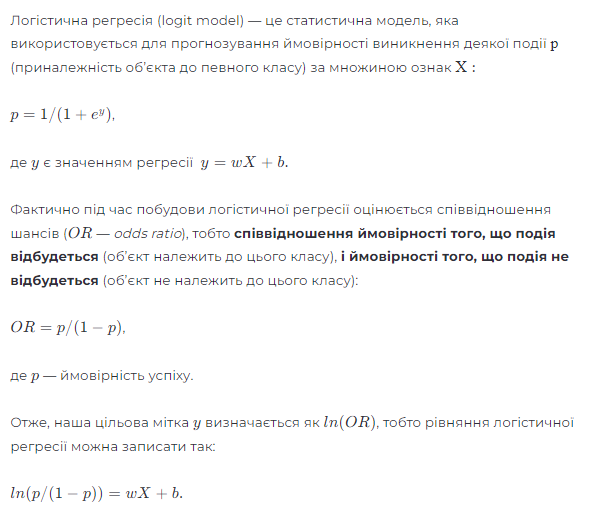


Задача 1.
Провести попередній аналіз даних. Побудувати логістичну регресію для датасета гриби

https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
from google.colab import files
import pandas as pd

# Завантаження файлу
uploaded = files.upload()

Saving mushroom.csv to mushroom.csv


In [ ]:
df = pd.read_csv('mushroom.csv')
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [ ]:
# Визначення цільової змінної та ознак
TARGET = 'class'
FEATURES = [col for col in df.columns if col != TARGET]

# Визначення категоріальних та числових ознак
cat_features = [col for col in FEATURES if df[col].nunique() < 25]
cont_features = [col for col in FEATURES if df[col].nunique() >= 25]

# Виведення результатів
print(f'Number of categorical features: {len(cat_features)}')
print('Categorical features:', cat_features, '\n')

print(f'Number of continuous features: {len(cont_features)}')
print('Continuous features:', cont_features, '\n')

Number of categorical features: 5
Categorical features: ['cap-shape', 'gill-attachment', 'gill-color', 'stem-color', 'season'] 

Number of continuous features: 3
Continuous features: ['cap-diameter', 'stem-height', 'stem-width'] 



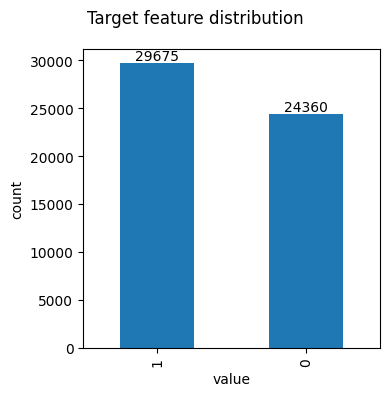

In [ ]:
ax = df[TARGET].value_counts().plot(kind='bar', figsize=(4, 4))
for i in ax.containers:
  ax.bar_label(i)
  ax.set_xlabel("value")
  ax.set_ylabel("count")

plt.suptitle("Target feature distribution")

plt.tight_layout()
plt.show()

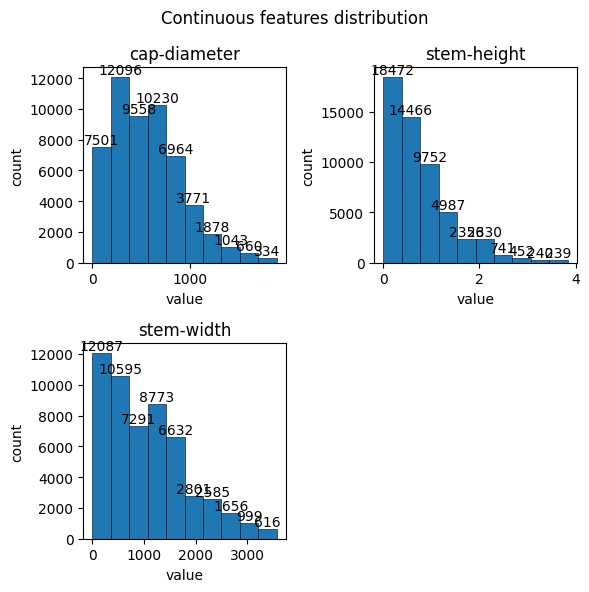

In [ ]:
ax = df.loc[:, cont_features].hist(figsize=(6, 6), grid=False, edgecolor='black', linewidth=.4)
for row in ax:
  for col in row:
    for i in col.containers:
      col.bar_label(i)
      col.set_xlabel("value")
      col.set_ylabel("count")

plt.suptitle("Continuous features distribution")

plt.tight_layout()
plt.show()

In [ ]:
df.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


In [ ]:
df.isnull().sum()

,0
cap-diameter,0
cap-shape,0
gill-attachment,0
gill-color,0
stem-height,0
stem-width,0
stem-color,0
season,0
class,0


In [ ]:
df.dtypes

,0
cap-diameter,int64
cap-shape,int64
gill-attachment,int64
gill-color,int64
stem-height,float64
stem-width,int64
stem-color,int64
season,float64
class,int64


In [ ]:
# Розрахунок кореляції
correlation_matrix = df.corr()

# Виведення кореляцій з цільовою змінною 'class'
correlation_with_class = correlation_matrix['class']
print(correlation_with_class)


cap-diameter      -0.165676
cap-shape         -0.133338
gill-attachment   -0.052541
gill-color        -0.063947
stem-height        0.183354
stem-width        -0.182856
stem-color        -0.128339
season            -0.082919
class              1.000000
Name: class, dtype: float64


In [ ]:
correlation_matrix

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
cap-diameter,1.000000,0.204011,0.200481,0.186377,0.135652,0.828469,0.121856,0.113334,-0.165676
cap-shape,0.204011,1.000000,0.043066,0.131387,-0.010393,0.222494,0.029035,0.055442,-0.133338
gill-attachment,0.200481,0.043066,1.000000,0.100276,-0.075284,0.245300,0.020073,-0.040315,-0.052541
gill-color,0.186377,0.131387,0.100276,1.000000,0.015057,0.110283,0.186090,0.059965,-0.063947
stem-height,0.135652,-0.010393,-0.075284,0.015057,1.000000,0.098095,0.002624,-0.000292,0.183354
stem-width,0.828469,0.222494,0.245300,0.110283,0.098095,1.000000,0.157394,0.040679,-0.182856
stem-color,0.121856,0.029035,0.020073,0.186090,0.002624,0.157394,1.000000,0.010750,-0.128339
season,0.113334,0.055442,-0.040315,0.059965,-0.000292,0.040679,0.010750,1.000000,-0.082919
class,-0.165676,-0.133338,-0.052541,-0.063947,0.183354,-0.182856,-0.128339,-0.082919,1.000000


In [ ]:
X = df.drop('class', axis=1)
y = df['class']

# Розділяємо на навчальні та тестові дані
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
log_reg = LogisticRegression()

# Визначаємо сітку параметрів для пошуку
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # параметр регуляризації
    'solver': ['lbfgs', 'liblinear'],  # алгоритми оптимізації
    'max_iter': [100, 200, 300]  # кількість ітерацій
}

# Використовуємо GridSearchCV для пошуку найкращих параметрів
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Отримуємо найкращі параметри
best_params = grid_search.best_params_
print("Найкращі параметри: ", best_params)

Найкращі параметри:  {'C': 0.01, 'max_iter': 100, 'solver': 'liblinear'}


In [ ]:
# Прогнозуємо, використовуючи найкращу модель
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Перевіряємо розміри y_test та y_pred
print("Розмір y_test:", y_test.shape)
print("Розмір y_pred:", y_pred.shape)

# Оцінюємо модель лише якщо розміри збігаються
if y_test.shape[0] == y_pred.shape[0]:
    print("Точність:", accuracy_score(y_test, y_pred))
    print("Звіт про класифікацію:\n", classification_report(y_test, y_pred))
else:
    print(f"Несумісність розмірів: y_test має {y_test.shape[0]} зразків, але y_pred має {y_pred.shape[0]} зразків.")

Розмір y_test: (16211,)
Розмір y_pred: (16211,)
Точність: 0.6356177903892418
Звіт про класифікацію:
               precision    recall  f1-score   support

           0       0.61      0.54      0.57      7349
           1       0.65      0.72      0.68      8862

    accuracy                           0.64     16211
   macro avg       0.63      0.63      0.63     16211
weighted avg       0.63      0.64      0.63     16211



In [ ]:
import numpy as np
# Отримуємо DataFrame з тестовими даними, справжніми та прогнозованими результатами
results = pd.DataFrame({
    'True Label': y_test,
    'Predicted Label': y_pred
})

# Вибираємо 10 випадкових прикладів
random_indices = np.random.choice(results.index, 10, replace=False)
random_results = results.loc[random_indices]

# Виводимо ці приклади
print(random_results)

       True Label  Predicted Label
24342           1                0
42611           1                1
50490           1                1
13581           0                1
31190           1                1
12557           1                1
36094           1                1
14773           1                0
3021            1                1
48624           0                0


Варіант 2. Будуємо лог. регресію

In [ ]:
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [ ]:
# Поділимо дані на тренувальну і тестову вибірки
TARGET = 'class'
X = df.drop(TARGET , axis =1 )
y = df[TARGET]

X_train , X_test , y_train , y_test = train_test_split(X, y, random_state = 42, test_size =0.33, stratify=y)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Для подальших коректних обрахунків транспонуємо матрицю вхідних ознак і вектор цільової змінної.
x_train = X_train.T
x_test = X_test.T
y_train = np.expand_dims(y_train.T, 0)
y_test = np.expand_dims(y_test.T, 0)

print('X train size', x_train.shape)
print('X test size', x_test.shape)
print('y train size', y_train.shape)
print('y test size', y_test.shape)

X train size (8, 36203)
X test size (8, 17832)
y train size (1, 36203)
y test size (1, 17832)


In [ ]:
#Ініціалізація параметрів моделі

def initialize_weights_and_bias(dimension):
    # dimension - number of input features
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

In [ ]:
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [ ]:
# In backward propagation we will use y_head that found in forward propagation
# Therefore instead of writing the backward propagation method, let's combine forward propagation and backward propagation
def forward_backward_propagation(w,b,x_train,y_train, eps=1e-5):

    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -1*y_train*np.log(y_head+eps)-(1-y_train)*np.log(1-y_head+eps)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling

    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost, gradients

In [ ]:
def compute_accuracy(y_head, y_train):
    predictions = (y_head > 0.5).astype(int)  # Бінарне перетворення ймовірностей у класи
    accuracy = np.mean(predictions == y_train)  # Середня точність
    return accuracy

In [ ]:
def update(w, b, x_train, y_train, learning_rate, number_of_iterations):
    cost_list = []
    accuracy_list = []
    index = []

    for i in range(number_of_iterations):
        cost, gradients = forward_backward_propagation(w, b, x_train, y_train)
        y_head = sigmoid(np.dot(w.T, x_train) + b)
        accuracy = compute_accuracy(y_head, y_train)

        cost_list.append(cost)
        accuracy_list.append(accuracy)
        index.append(i)

        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]

    parameters = {"weight": w, "bias": b}

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(index, cost_list, label='Cost')
    plt.xticks(index, rotation='vertical')
    plt.xlabel("Number of Iterations")
    plt.ylabel("Cost")
    plt.title('Графік функції втрат')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(index, accuracy_list, label='Accuracy', color='orange')
    plt.xticks(index, rotation='vertical')
    plt.xlabel("Number of Iterations")
    plt.ylabel("Accuracy")
    plt.title('Графік точності')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    return parameters, gradients, cost_list, accuracy_list

In [ ]:
def predict(w,b,x_test):
    # x_test is a input for forward propagation

    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))

    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

In [ ]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, num_iterations):
    # Ініціалізація
    dimension = x_train.shape[0]
    w, b = initialize_weights_and_bias(dimension)

    # Оновлення параметрів і отримання всіх значень
    parameters, gradients, cost_list, accuracy_list = update(w, b, x_train, y_train, learning_rate, num_iterations)

    # Прогнозування
    y_prediction_test = predict(parameters["weight"], parameters["bias"], x_test)
    y_prediction_train = predict(parameters["weight"], parameters["bias"], x_train)

    # Розрахунок точності
    train_accuracy = np.mean(y_prediction_train == y_train) * 100
    test_accuracy = np.mean(y_prediction_test == y_test) * 100

    # Виведення точності
    print("Train accuracy: {:.2f} %".format(train_accuracy))
    print("Test accuracy: {:.2f} %".format(test_accuracy))

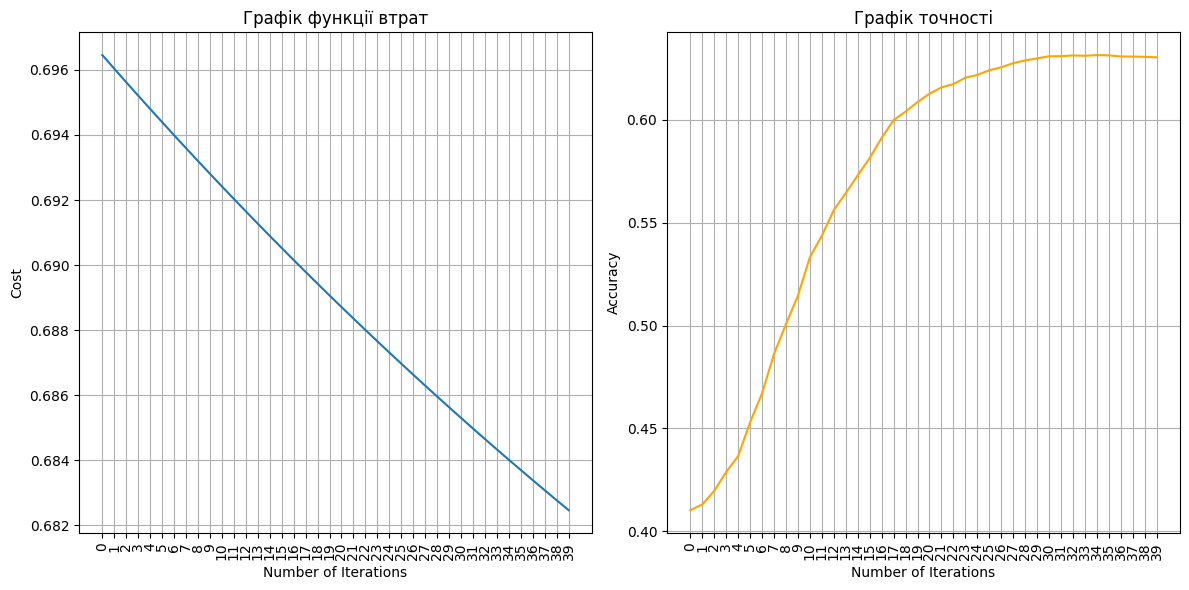

Train accuracy: 63.01 %
Test accuracy: 62.98 %


In [ ]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 40)